##import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/household_power_consumption.txt')
dataset

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
2075254,26/11/2010;20:58:00;0.946;0.000;240.430;4.000;...
2075255,26/11/2010;20:59:00;0.944;0.000;240.000;4.000;...
2075256,26/11/2010;21:00:00;0.938;0.000;239.820;3.800;...
2075257,26/11/2010;21:01:00;0.934;0.000;239.700;3.800;...


In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv')
dataset

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:

dataset.set_index('Month',inplace=True)
dataset=dataset.fillna(method='ffill')

In [ ]:
dataset

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587
...,...
1968-08,16722
1968-09,14385
1968-10,21342


<function matplotlib.pyplot.show>

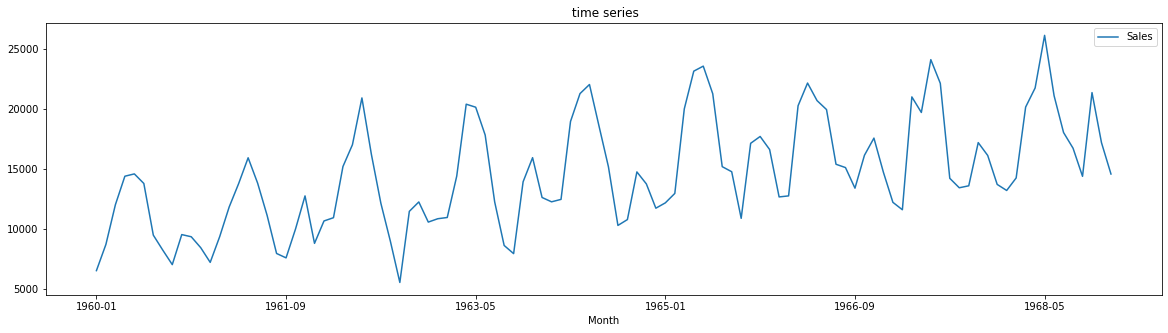

In [ ]:
dataset.plot(figsize=(20,5))

plt.title(' time series')
plt.show

##Series to Suprevised

In [ ]:
def to_supervised(train, n_input, n_out):
	# flatten data
	data = train
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input)))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)


##Choose the optimal Lag Observation using ACF plot

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.tsa.stattools as sts

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sts.adfuller(dataset.Sales)

(-1.2238127661752811,
 0.663269104983288,
 12,
 95,
 {'1%': -3.5011373281819504,
  '10%': -2.5832749307479226,
  '5%': -2.8924800524857854},
 1671.1995896872572)

In [ ]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [ ]:
dataset=np.array(dataset)
dataset_diff=difference(dataset,1)

In [ ]:
dataset_diff=pd.DataFrame(dataset_diff)

In [ ]:
sts.adfuller(dataset_diff.iloc[:,0])

(-6.19979923080069,
 5.844752599276972e-08,
 11,
 95,
 {'1%': -3.5011373281819504,
  '10%': -2.5832749307479226,
  '5%': -2.8924800524857854},
 1654.0334866146454)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

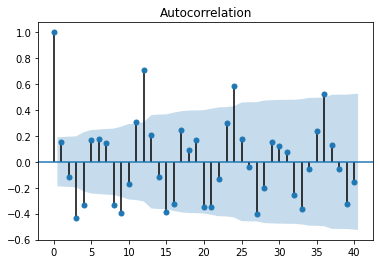

In [ ]:
plot_acf(dataset_diff, lags=40)
plt.show()


In [ ]:
from numpy import array

In [ ]:
n_step=3
lag=12

In [ ]:
X,y=to_supervised(dataset,n_input=lag,n_out=n_step)

In [ ]:
X.shape ,y.shape

((94, 12), (94, 3))

##Train Test Split


In [ ]:
n_test=15

In [ ]:
x_train,x_test=X[:-n_test,:],X[-n_test:,:]


In [ ]:
y_train,y_test=y[:-n_test,:],y[-n_test:,:]

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((79, 12), (15, 12), (79, 3), (15, 3))

##Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_train.shape,y_train.shape

((79, 12), (79, 3))

In [ ]:
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)
x_test.shape,y_test.shape

((15, 12), (15, 3))

In [ ]:
x_test

array([[0.28100698, 0.1437505 , 0.36294396, 0.47735108, 0.24949892,
        0.04946685, 0.        , 0.60322756, 0.50290946, 0.84343238,
        0.69082163, 0.07836139],
       [0.1437505 , 0.36294396, 0.47735108, 0.24949892, 0.04946685,
        0.        , 0.75178385, 0.50290946, 0.84343238, 0.69082163,
        0.07836139, 0.01737916],
       [0.36294396, 0.47735108, 0.24949892, 0.04946685, 0.        ,
        0.75178385, 0.64811994, 0.84343238, 0.69082163, 0.07836139,
        0.01737916, 0.03010319],
       [0.47735108, 0.24949892, 0.04946685, 0.        , 0.75178385,
        0.64811994, 1.        , 0.69082163, 0.07836139, 0.01737916,
        0.03010319, 0.30855768],
       [0.24949892, 0.04946685, 0.        , 0.75178385, 0.64811994,
        1.        , 0.84229937, 0.07836139, 0.01737916, 0.03010319,
        0.30855768, 0.22569633],
       [0.04946685, 0.        , 0.75178385, 0.64811994, 1.        ,
        0.84229937, 0.20941233, 0.01737916, 0.03010319, 0.30855768,
        0.22569633,

##MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define model
model_mlp = Sequential()
model_mlp.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(n_step,activation='selu'))
model_mlp.compile(loss='mse', optimizer='adam')

In [ ]:
model_mlp.fit(x_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
5/5 [==============================] - 15s 4ms/step - loss: 0.5446
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4074
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2853
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2094
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1363
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1062
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0969
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0694
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0711
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0422
Epoch 13/100
5/5 [==============================] - 0s 3ms/s

### predict test set

In [ ]:
# make predictions
predict_mlp = model_mlp.predict(x_test)
predict_mlp.shape

(15, 3)

In [ ]:
y_test.shape

(15, 3)

###MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_mlp= mean_squared_error(y_test, predict_mlp)


In [ ]:
mse_mlp

0.030498086173413454

###Inverse_transform

In [ ]:
# invert predictions
inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred=scaler.inverse_transform(predict_mlp)


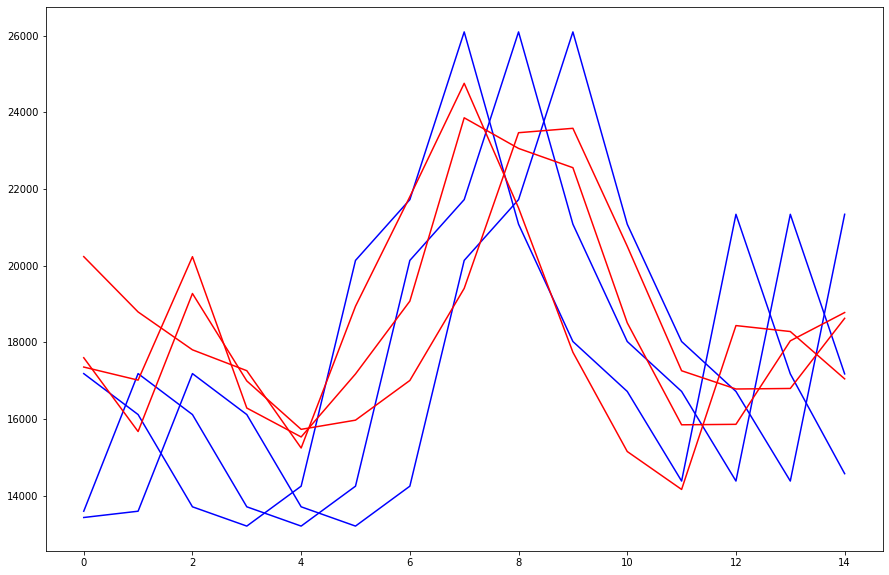

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred, color='r', label='Predicted ')

###Predict Next Step

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
input_samples=x_test[-1:,:]

In [ ]:
input_samples.shape

(1, 12)

In [ ]:
next_step=model_mlp.predict(input_samples)
next_step=scaler.inverse_transform(next_step)

In [ ]:
next_step

array([[18629.178, 18779.75 , 17049.766]], dtype=float32)

##RNN

### 3D input shape=[n_sample,timesteps,input_dim]

In [ ]:
x_train_3d=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test_3d=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train_3d.shape,x_test_3d.shape

((79, 12, 1), (15, 12, 1))

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
model_simple_RNN=Sequential()
model_simple_RNN.add(SimpleRNN(10,activation='relu',input_shape=(x_train_3d.shape[1],x_train_3d.shape[2]),return_sequences=True))
model_simple_RNN.add(SimpleRNN(20,activation='relu',return_sequences=True))
model_simple_RNN.add(SimpleRNN(30,activation='relu',return_sequences=False))
model_simple_RNN.add(Dense(n_step))
model_simple_RNN.compile(optimizer='adam',loss='mse')

In [ ]:
model_simple_RNN.fit(x_train_3d,y_train,epochs=100,batch_size=16)

Epoch 1/100
5/5 [==============================] - 12s 11ms/step - loss: 0.4404
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.3529
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.3039
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.2982
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2643
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2334
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2227
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1922
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1383
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0782
Epoch 11/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0734
Epoch 12/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0619
Epoch 13/100
5/5 [==============================] - 

In [ ]:
# make predictions
predict_simpleRNN= model_simple_RNN.predict(x_test_3d)
predict_simpleRNN.shape

(15, 3)

In [ ]:
mse_simpleRNN= mean_squared_error(y_test, predict_simpleRNN)
mse_simpleRNN

0.03442274311246922

In [ ]:
# invert predictions
#inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred_simpleRNN=scaler.inverse_transform(predict_simpleRNN)


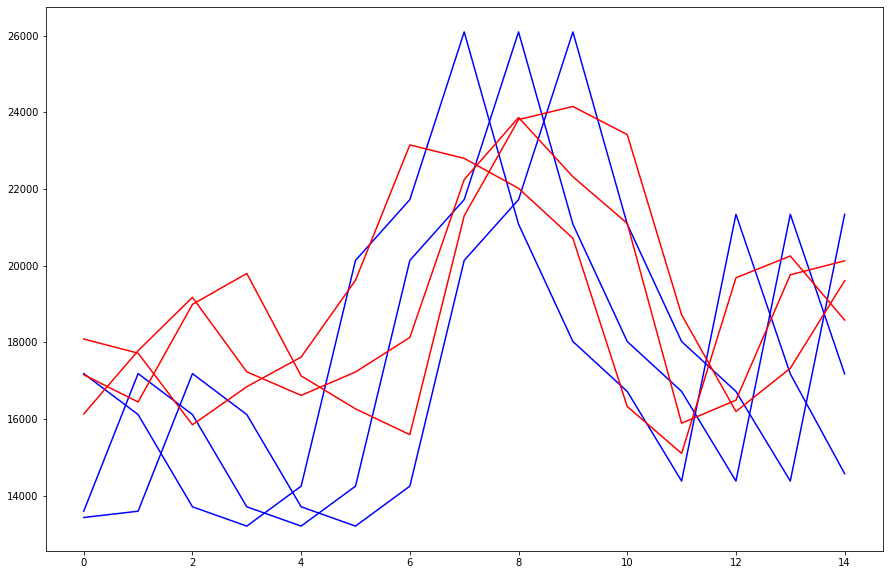

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred_simpleRNN, color='r', label='Predicted ')

In [ ]:
input_samples=x_test_3d[-1:,:,:]
next_step_simpleRNN=model_simple_RNN.predict(input_samples)
next_step_simpleRNN=scaler.inverse_transform(next_step_simpleRNN)
next_step_simpleRNN

array([[19610.674, 20128.602, 18582.314]], dtype=float32)

##LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
model_LSTM=Sequential()
model_LSTM.add(LSTM(10,activation='relu',input_shape=(x_train_3d.shape[1],x_train_3d.shape[2]),return_sequences=True))
model_LSTM.add(LSTM(20,activation='relu',return_sequences=True))
model_LSTM.add(LSTM(30,activation='relu',return_sequences=False))
model_LSTM.add(Dense(n_step))
model_LSTM.compile(optimizer='adam',loss='mse')

In [ ]:
model_LSTM.fit(x_train_3d,y_train,epochs=100,batch_size=16)

Epoch 1/100
5/5 [==============================] - 8s 16ms/step - loss: 0.2986
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2806
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2390
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1912
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1620
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.1011
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0547
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0625
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0508
Epoch 10/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0447
Epoch 11/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0494
Epoch 12/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0471
Epoch 13/100
5/5 [==============================]

In [ ]:
# make predictions
predict_LSTM= model_LSTM.predict(x_test_3d)
predict_LSTM.shape

(15, 3)

In [ ]:
mse_LSTM= mean_squared_error(y_test, predict_LSTM)
mse_LSTM

0.06206582503881369

In [ ]:
# invert predictions
#inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred_LSTM=scaler.inverse_transform(predict_LSTM)


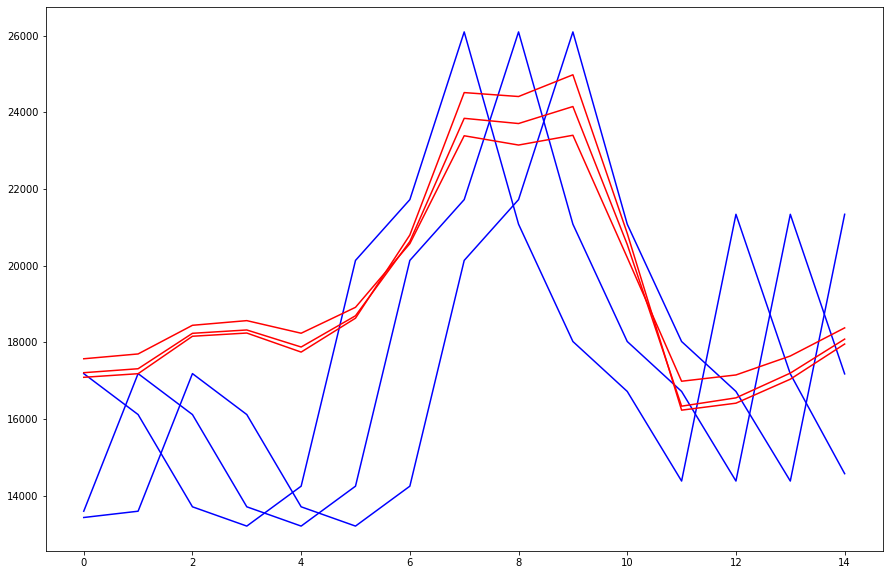

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred_LSTM, color='r', label='Predicted ')